---
title: "Graphs"
author: "VF"
date: "2020-09-09"
output: html_document
---

In [5]:
#knitr::opts_chunk$set(echo = TRUE)
R.Version()$version.string

[1] "R version 4.0.2 (2020-06-22)"

Resulting graphs and cleaned and prepared data can be found at 
https://drive.google.com/drive/folders/1Yo0IW4awCIvWMP6jYVKpn3kLgEolse0e?usp=sharing
for publication 

In [14]:
rm(list = setdiff(ls(), c('ECDC0', 'JHH0', 'JHH', 'ECDC', 'JHHRegios', 'ECDCRegios','testing')))
options(warn = 0)
if (!exists('JHH')) source('loadData.R') else 
  if (max(JHH$Date) < Sys.Date() - 1) source('loadData.R')  else source('definitions.R')
tibble(maxECDCdate = max(ECDC$Date), maxJHHdate = max(JHH$Date))# % % "is the last Date for ECDC data, and " % % "is max date for JHH data"

[1] "I run MS Windows."


maxECDCdate,maxJHHdate
<date>,<date>
2020-09-09,2020-09-09


In [7]:
save.image(".RData") #D:/gits/Covid19/

If you want to write the data to disk, make sure to define the correct datapath so that R can write to it. By default it is a subfolder of the scripts folder. Note that the data will also be written to a subfolder of the plots folder. 

In [15]:
dataPath <- './data'
if (!dir.exists(dataPath)) dir.create(dataPath, recursive = TRUE)
writeWithCounters(ECDC,name = "Covid19ECDC")
writeWithCounters(JHH,name = "Covid19JHH") 

[1] "Written the current data with counters to disk as Covid19ECDC_days.csv for use in Tableau or Excel"
[1] "Written the current data with counters to disk as Covid19JHH_days.csv for use in Tableau or Excel"


Graph active_imputed, recovered, deaths, and confirmed for some selected territories, 
based on JHH data:

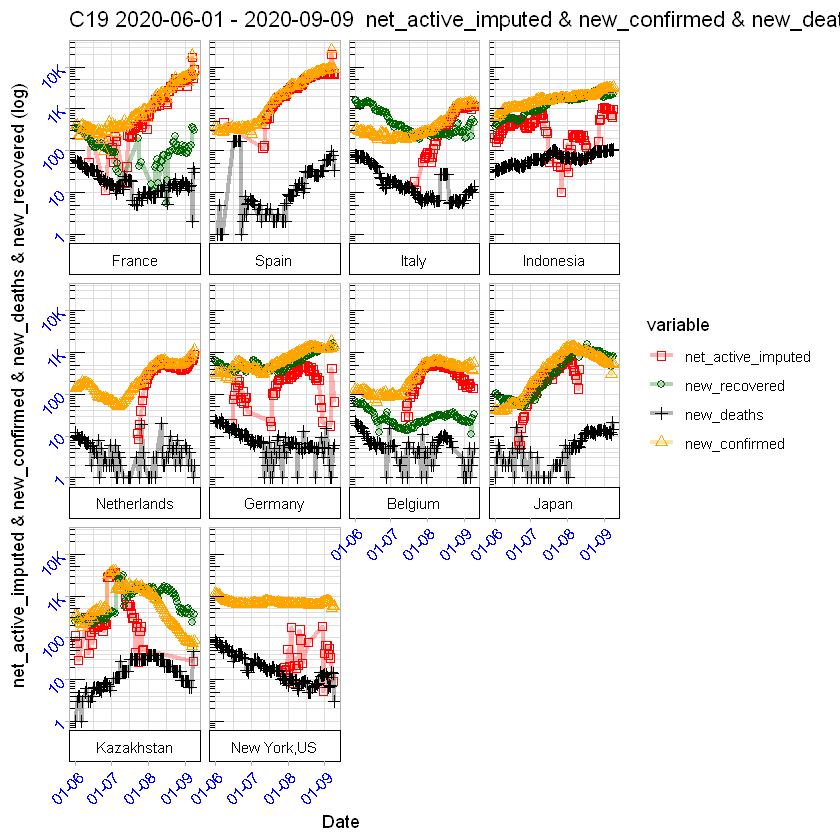

In [6]:
graphit(JHH, regios$Vincent, xvar = 'Date', 
        yvars = c('net_active_imputed','new_recovered','new_deaths','new_confirmed'),
        facet = "PSCR", logy = TRUE,from = "2020-06-01")

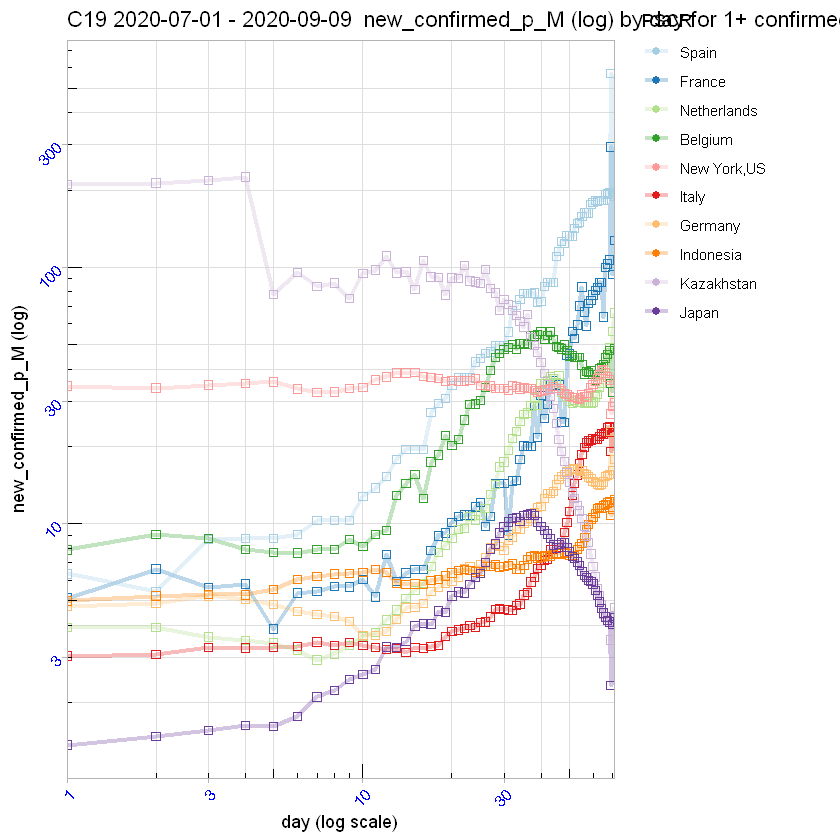

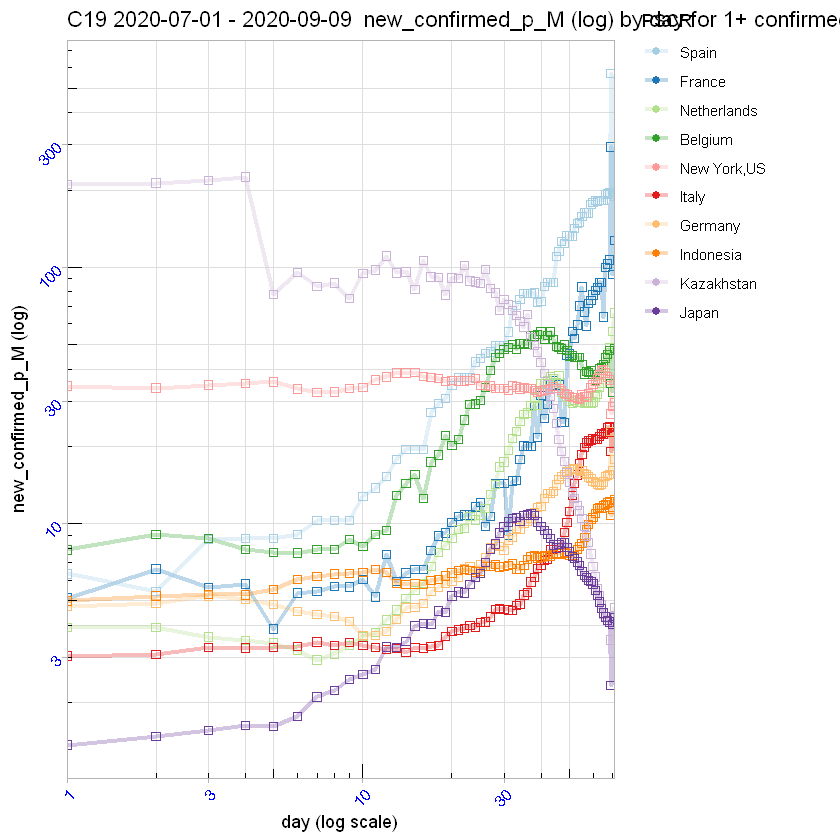

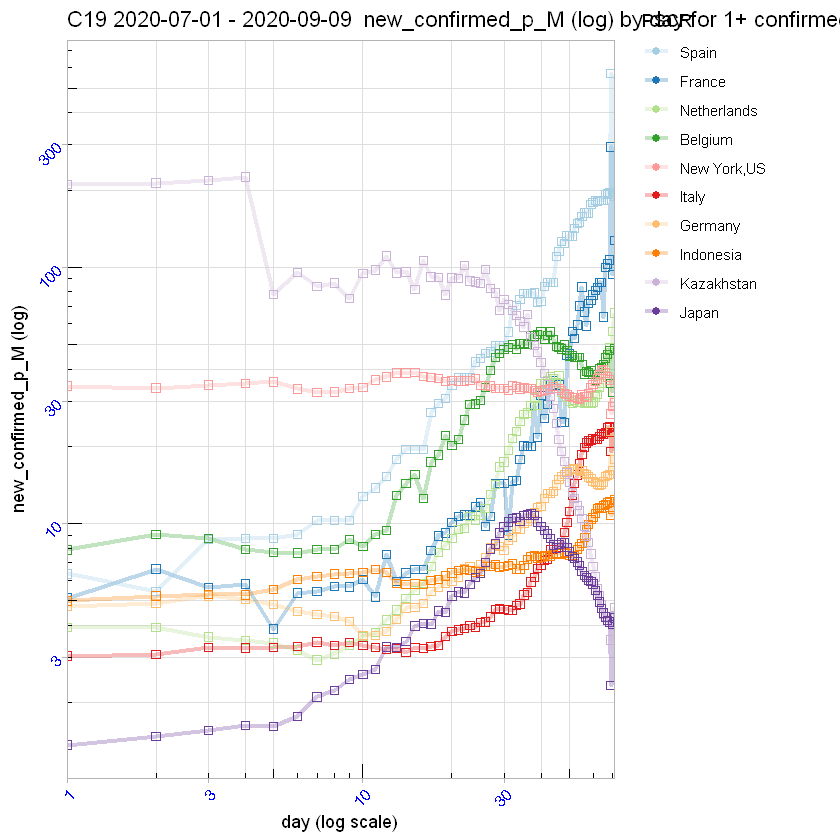

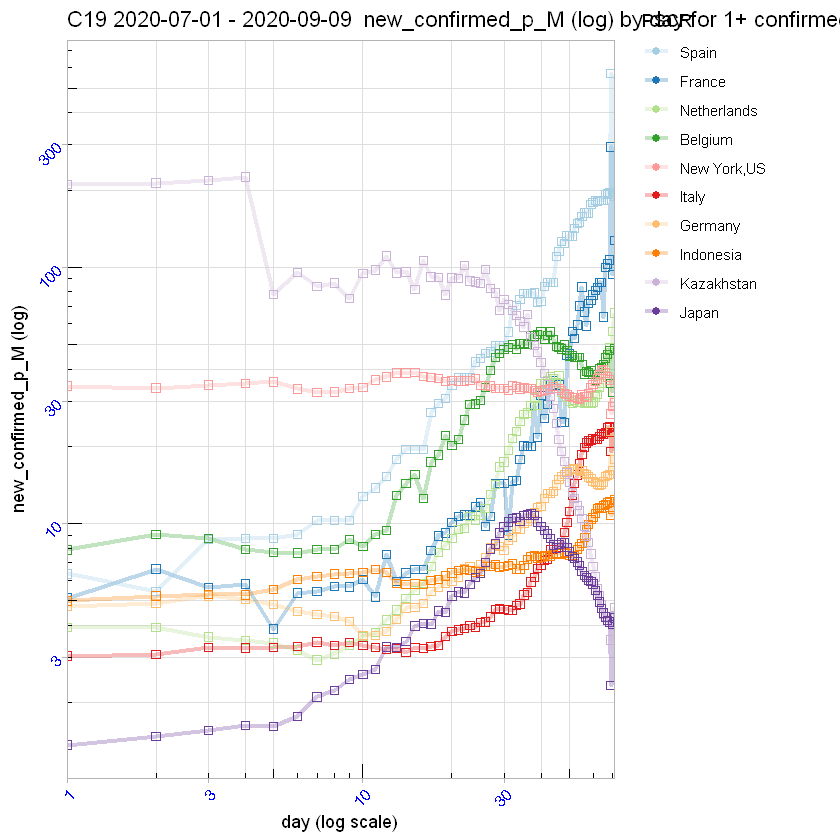

In [7]:
source("graphit.R")
graphit(JHH, regios$Vincent, xvar = 'day', logx =  TRUE , logy = TRUE, from = "2020-07-01",
          yvars = c('new_confirmed_p_M'), labmeth = 'repel_label', putlegend = FALSE)
graphit(JHH, regios$Vincent, xvar = 'day', logx =  TRUE , logy = TRUE, from = "2020-07-01",
          yvars = c('new_confirmed_p_M'), labmeth = 'repel_text')
graphit(JHH, regios$Vincent, xvar = 'day', logx =  TRUE , logy = TRUE, from = "2020-07-01",
          yvars = c('new_confirmed_p_M'), labmeth = 'dl_polygon')
graphit(JHH, regios$Vincent, xvar = 'day', logx =  TRUE , logy = TRUE, from = "2020-07-01",
          yvars = c('new_confirmed_p_M'), labmeth = 'dl_bumpup', putlegend = TRUE)

Show table outputs: 

In [8]:
#show some data table output

#JHH[JHH$Date == max(JHH$Date),'Date'][1,1]
JHH %>% filter(Date == max(Date)) %>% filter(!is.nan(new_active_rate)) %>%
  select(PSCR,confirmed, active_imputed, deaths, new_confirmed, new_active_rate, active_imputed_growthRate, 
         active_imputed_p_M) %>% arrange(new_active_rate) %>% tail(10)

PSCR,confirmed,active_imputed,deaths,new_confirmed,new_active_rate,active_imputed_growthRate,active_imputed_p_M
<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Fiji,32,4,2,1,0.333,0.121117083,4.527535
Belarus,73402,677,726,194,0.340,0.008145492,71.372952
Ghana,45313,842,283,301,0.362,-0.032654283,28.286255
San Marino,722,18,42,6,0.429,-0.092404901,532.780820
"Saint Barthelemy,France",21,8,0,3,0.600,0.045204794,810.454868
"Guadeloupe,France",2287,1928,23,924,0.916,0.071474094,4794.600603
"Cayman Islands,United Kingdom",207,2,1,2,Inf,0.000000000,29.378929
Djibouti,5391,3,61,3,Inf,-0.265509901,3.128520
Saint Lucia,27,1,0,1,Inf,0.000000000,5.497859


and Countries we're interested in latest numbers: 

In [9]:
JHH[JHH$Date == max(JHH$Date) & JHH$PSCR %in% 
      c('EU','World',"Kazakhstan",'Belgium','Spain','US','Netherlands','Europe',
        'Germany','France','Africa','Russia','Brazil'),
    c('PSCR','active_imputed','active_imputed_p_M','new_deaths','new_confirmed',
      'new_active_rate', 'active_imputed_growthRate','confirmed') ]  %>%
  arrange(new_active_rate)


PSCR,active_imputed,active_imputed_p_M,new_deaths,new_confirmed,new_active_rate,active_imputed_growthRate,confirmed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Kazakhstan,4702,257.2703,0,86,0.017,-0.0764217095,106584
US,1900884,5728.8153,1206,34256,0.018,-0.0203111505,6361265
Belgium,22291,1951.5730,5,550,0.025,0.0108028957,89691
Russia,165377,1144.6514,141,5172,0.031,0.0013887324,1037526
Africa,233920,183.1714,192,8295,0.035,0.0006958631,1322473
Spain,259608,5556.2322,34,8866,0.035,0.0419544065,543379
World,8308290,1107.2817,6303,292991,0.035,0.0081032924,27863733
Europe,1129155,1477.8240,413,41204,0.037,0.0271818383,4026041
Netherlands,23971,1391.1541,2,1140,0.049,0.0412696316,77688


Who overtakes us based the JHH data set on latest day data? 

In [10]:
map_dfc(c('Kazakhstan','Belgium','Netherlands','Sweden'),
        function(x) overtakeDays_df(JHH,x,who = 'theyme',lastDays = 1))

overtakes Kazakhstan,days,overtakes Belgium,days1,overtakes Netherlands,days2,overtakes Sweden,days3
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Romania,7.0,Morocco,7.4,Costa Rica,141.5,"Wisconsin,US",3.7
"Missouri,US",7.3,Netherlands,20.3,"Idaho,US",180.1,Morocco,4.0
Dominican Republic,7.8,"Wisconsin,US",20.7,Venezuela,436.2,Netherlands,8.5
"Indiana,US",8.2,Guatemala,28.7,Czechia,2455.4,Guatemala,8.6
Panama,13.7,United Arab Emirates,41.2,NA,NA,United Arab Emirates,13.9
Morocco,13.9,Costa Rica,49.5,NA,NA,"Washington,US",27.0
Kuwait,19.3,Venezuela,51.6,NA,NA,"Oklahoma,US",28.4
Netherlands,27.4,"Idaho,US",65.9,NA,NA,Venezuela,28.7
"Wisconsin,US",30.2,"Oklahoma,US",72.9,NA,NA,Costa Rica,30.0


And on 7 day averages in JHH? 

In [16]:
map_dfc(c('Kazakhstan','Belgium','Netherlands','Sweden'),
        function(x) overtakeDays_df(JHH,x,who = 'theyme',lastDays = 7))

New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8



overtakes Kazakhstan,days...2,overtakes Belgium,days...4,overtakes Netherlands,days...6,overtakes Sweden,days...8
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
"Indiana,US",7.7,Morocco,9.4,Costa Rica,67.0,"Wisconsin,US",4.4
Romania,7.7,"Wisconsin,US",20.0,Venezuela,74.1,Morocco,5.3
"Missouri,US",8.0,Netherlands,33.5,Ethiopia,79.0,"Minnesota,US",10.5
Dominican Republic,9.8,Ethiopia,49.9,Nepal,135.8,Netherlands,13.3
Panama,12.5,Costa Rica,51.1,NA,NA,Guatemala,17.1
Morocco,17.3,Venezuela,51.4,NA,NA,United Arab Emirates,24.0
Kuwait,20.3,"Minnesota,US",61.8,NA,NA,Ethiopia,29.6
"Wisconsin,US",32.3,Nepal,71.3,NA,NA,Venezuela,32.5
Netherlands,37.9,"Oklahoma,US",76.9,NA,NA,Costa Rica,34.3


And according to ECDC? 

In [17]:
map_dfc(c('Kazakhstan','Belgium','Netherlands','Sweden'), 
        function(x) overtakeDays_df(ECDC,x,who = 'theyme',lastDays = 7))

New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8



overtakes Kazakhstan,days...2,overtakes Belgium,days...4,overtakes Netherlands,days...6,overtakes Sweden,days...8
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Canada,3.7,Morocco,9.2,Morocco,0.8,Morocco,6.6
Bolivia,37.4,Netherlands,23.5,Ethiopia,49.3,Netherlands,15.6
Morocco,44.3,Oman,25.1,Costa_Rica,104.3,Guatemala,22.9
Romania,49.5,Ethiopia,33.1,Nepal,106.4,United_Arab_Emirates,26.8
Ethiopia,101.7,United_Arab_Emirates,41.3,Venezuela,154.6,Ethiopia,27.3
Panama,110.1,Guatemala,42.0,Paraguay,3903.6,Japan,39.9
Kuwait,115.7,Costa_Rica,49.6,NA,NA,Costa_Rica,42.2
Costa_Rica,127.8,Nepal,51.1,NA,NA,Venezuela,42.6
Nepal,128.2,Venezuela,51.2,NA,NA,Nepal,43.7


Who is more affected? 

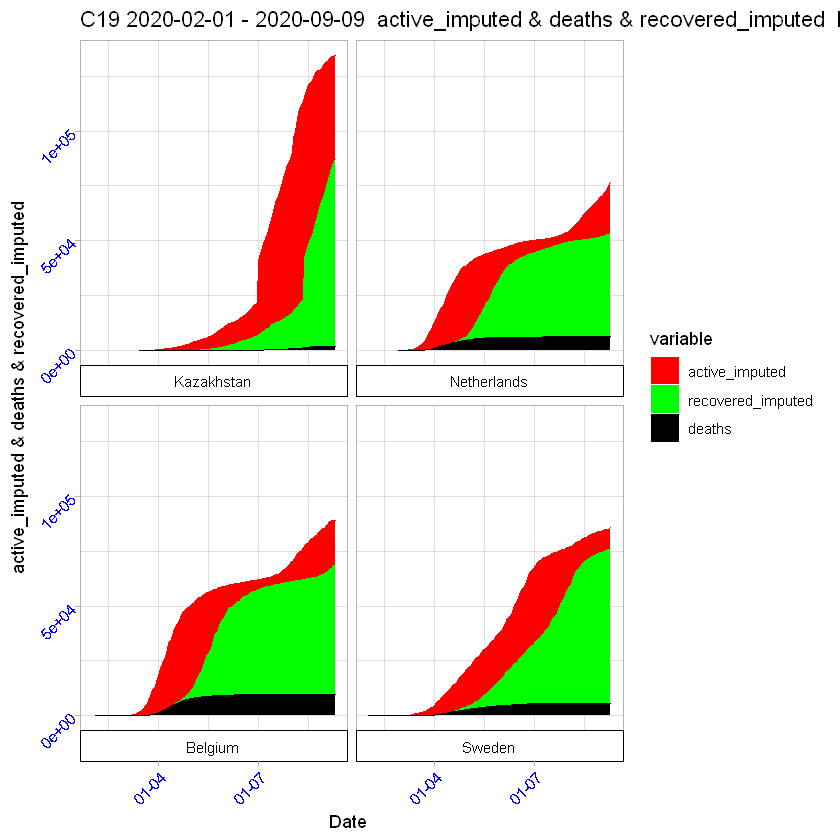

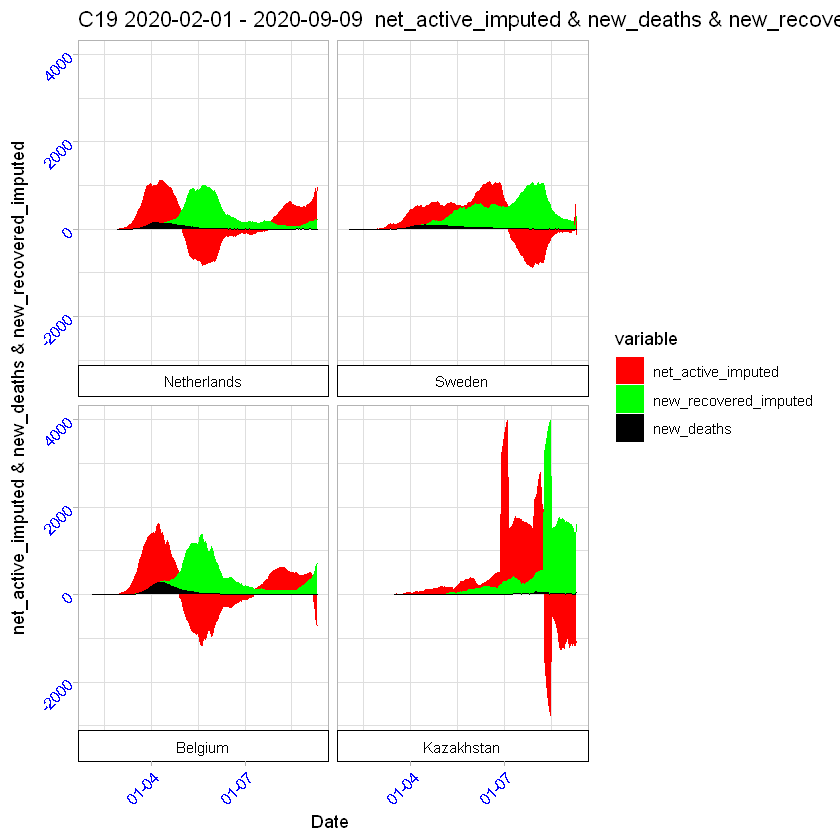

In [18]:
graph3Dard_fia(ECDC, c('Kazakhstan','Belgium','Netherlands','Sweden'))
graph3Dard_fina(ECDC, c('Kazakhstan','Belgium','Netherlands','Sweden'))

Who do we overtake?

In [19]:
map_dfc(c('Kazakhstan','Belgium','Netherlands','Sweden'),function(x) overtakeDays_df(JHH,x,who = 'Ithem',lastDays = 7))
map_dfc(c('Kazakhstan','Belgium','Netherlands','Sweden'),function(x) overtakeDays_df(ECDC,x,who = 'Ithem',lastDays = 7))

New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8



Kazakhstan overtakes,days...2,Belgium overtakes,days...4,Netherlands overtakes,days...6,Sweden overtakes,days...8
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Ecuador,5.4,China,0.9,"Washington,US",0.6,China,20.5
"Massachusetts,US",35.1,Ecuador,15.5,Guatemala,7.8,Ecuador,22.1
NA,NA,Egypt,34.3,Sweden,13.3,"Massachusetts,US",60.2
NA,NA,"Massachusetts,US",38.2,China,15.1,Kazakhstan,140.5
NA,NA,Kazakhstan,41.9,Oman,17.8,Egypt,258.7
NA,NA,Qatar,127.3,"Minnesota,US",18.0,NA,NA
NA,NA,"New Jersey,US",701.5,Ecuador,19.1,NA,NA
NA,NA,"Arizona,US",2268.5,"Mississippi,US",26.0,NA,NA
NA,NA,Pakistan,4132.6,Belgium,33.5,NA,NA


New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8



Kazakhstan overtakes,days...2,Belgium overtakes,days...4,Netherlands overtakes,days...6,Sweden overtakes,days...8
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
NA,NA,China,4.8,Guatemala,7.8,Ecuador,18.6
NA,NA,Ecuador,15.5,Sweden,15.6,China,27.4
NA,NA,Egypt,151.2,Ecuador,17.7,Egypt,962.8
NA,NA,Qatar,2323.4,China,18.1,NA,NA
NA,NA,NA,NA,Oman,23.3,NA,NA
NA,NA,NA,NA,Belgium,23.5,NA,NA
NA,NA,NA,NA,Egypt,39.0,NA,NA
NA,NA,NA,NA,Qatar,80.4,NA,NA
NA,NA,NA,NA,Kazakhstan,142.4,NA,NA


Lets see who is going to overtake the UK, France, or GErmany soon: 

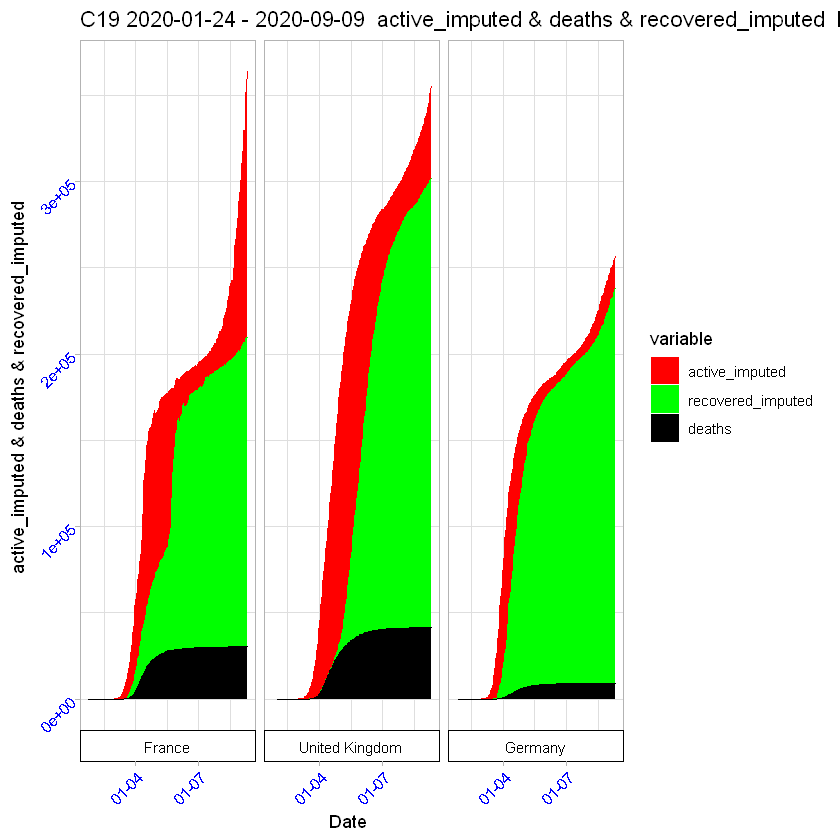

New names:
* days -> days...2
* days -> days...4
* days -> days...6



overtakes Germany,days...2,overtakes France,days...4,overtakes United Kingdom,days...6
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
"Illinois,US",1.6,NA,NA,Iraq,39.7
Philippines,9.1,NA,NA,Indonesia,192.2
Indonesia,30.3,NA,NA,Israel,343.8
Israel,72.7,NA,NA,Philippines,401.5
Ukraine,101.5,NA,NA,Ukraine,1730.4
Morocco,521.0,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA


New names:
* days -> days...2
* days -> days...4
* days -> days...6



Germany overtakes,days...2,France overtakes,days...4,United Kingdom overtakes,days...6
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Pakistan,45.4,Iran,4.6,"New York,US",50.7
Saudi Arabia,111.6,Chile,9.2,Chile,103.7
"New York,US",252.1,"New York,US",9.9,Iran,151.3
Italy,829.9,South Africa,40.2,South Africa,369.2
NA,NA,"Florida,US",49.0,NA,NA
NA,NA,"Texas,US",60.5,NA,NA
NA,NA,"California,US",77.8,NA,NA
NA,NA,Mexico,79.8,NA,NA
NA,NA,Peru,99.6,NA,NA


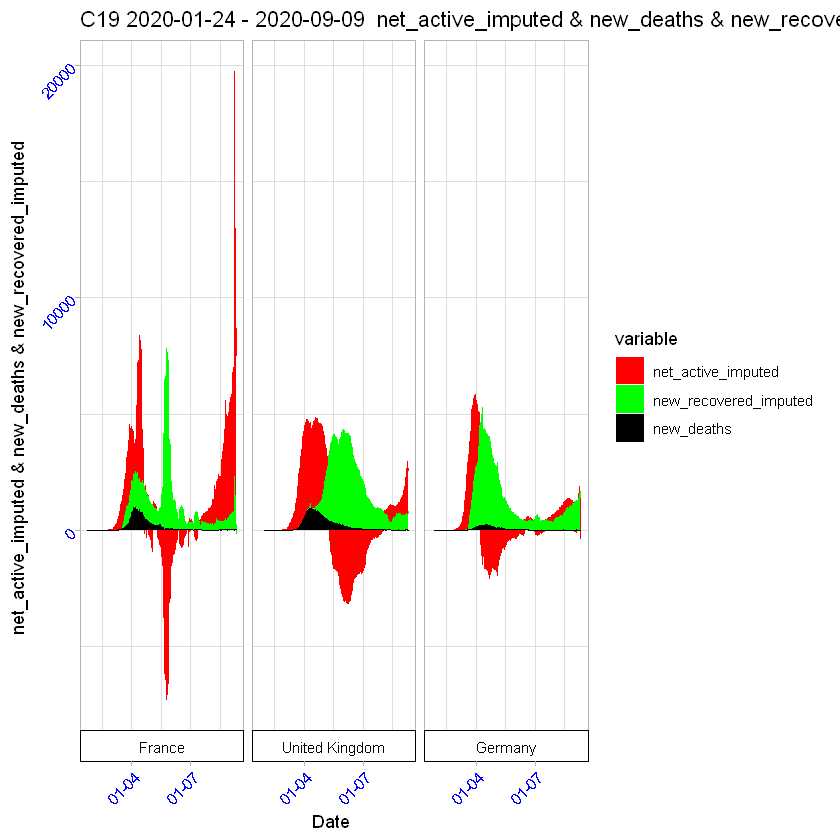

In [20]:
graph3Dard_fia(JHH, c('Germany','France','United Kingdom'))
graph3Dard_fina(JHH, c('Germany','France','United Kingdom'))
map_dfc(c('Germany','France','United Kingdom'), function(x) overtakeDays_df(JHH,x,who = "theyme", lastDays = 7))
map_dfc(c('Germany','France','United Kingdom'), function(x) overtakeDays_df(JHH,x,who = "Ithem", lastDays = 7))

Not overtaking anyone does not mean the epidemic is under control. It just means your epidemic is alsready larger than all states that grow slower. It also means you have better control than more severely touched territories. 
For New York state, Indonesia, Peru, India: 

New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8
* days -> days...10
* ...



"New York,US overtakes",days...2,"California,US overtakes",days...4,"Florida,US overtakes",days...6,"Texas,US overtakes",days...8,Peru overtakes,days...10,"Arizona,US overtakes",days...12
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
NA,NA,NA,NA,NA,NA,"California,US",277,"California,US",37.8,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


New names:
* days -> days...2
* days -> days...4
* days -> days...6
* days -> days...8
* days -> days...10
* ...



"overtakes New York,US",days...2,"overtakes California,US",days...4,"overtakes Florida,US",days...6,"overtakes Texas,US",days...8,overtakes Peru,days...10,"overtakes Arizona,US",days...12
<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
France,7.1,Colombia,15.2,Mexico,2.0,Spain,10.6,Colombia,3.6,Indonesia,1.1
Chile,14.8,Spain,17.0,Spain,8.5,Mexico,15.1,Spain,14.4,Israel,20.3
Iran,28.0,Argentina,28.1,Argentina,15.2,Argentina,19.2,Argentina,26.3,Ukraine,27.4
United Kingdom,40.2,Peru,37.8,France,30.2,France,36.2,France,45.3,"North Carolina,US",43.5
Iraq,42.5,France,44.1,Iraq,148.9,Iraq,284.4,Mexico,181.0,"Tennessee,US",70.2
Bangladesh,77.4,Mexico,61.7,Israel,331.6,Israel,1367.3,Iraq,1315.8,Morocco,82.0
Indonesia,94.1,"Texas,US",277.0,Indonesia,395.5,NA,NA,NA,NA,"Louisiana,US",117.9
Philippines,96.0,Iraq,283.1,United Kingdom,398.0,NA,NA,NA,NA,"Pennsylvania,US",126.9
Israel,102.3,Israel,900.7,Philippines,626.3,NA,NA,NA,NA,Romania,129.1


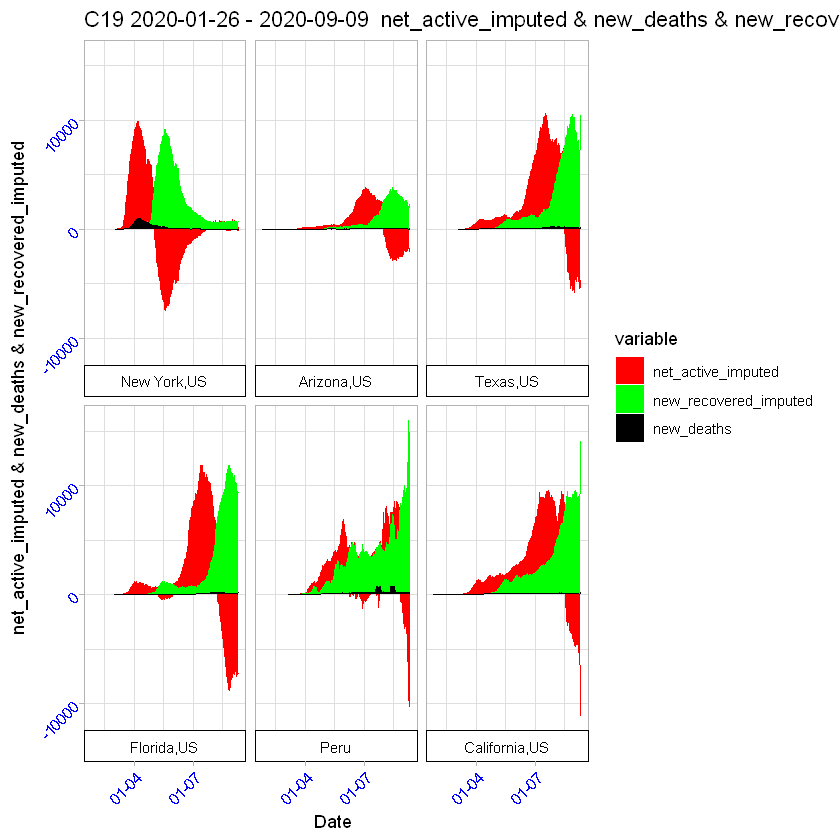

In [21]:
graph3Dard_fina(JHH, c('New York,US','California,US','Florida,US','Texas,US','Peru',"Arizona,US"))
map_dfc(c('New York,US','California,US','Florida,US','Texas,US','Peru',"Arizona,US"),
        function(x) overtakeDays_df(JHH,x,who = 'Ithem'))
map_dfc(c('New York,US','California,US','Florida,US','Texas,US','Peru',"Arizona,US"),
        function(x) overtakeDays_df(JHH,x,who = 'theyme'))

See how the most affected regions in the world are developing: (pop the graph out to a new window in Rstudio and enlarge to see more detail)

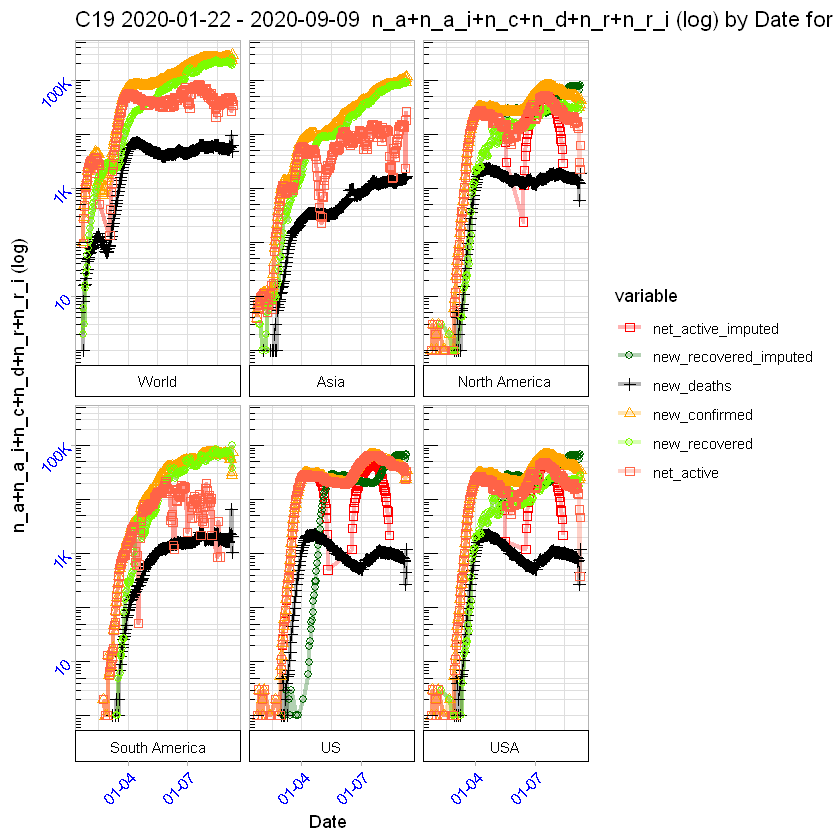

In [22]:
graph6Dardcra_finyl(JHH, JHHRegios$`JHH World1`)

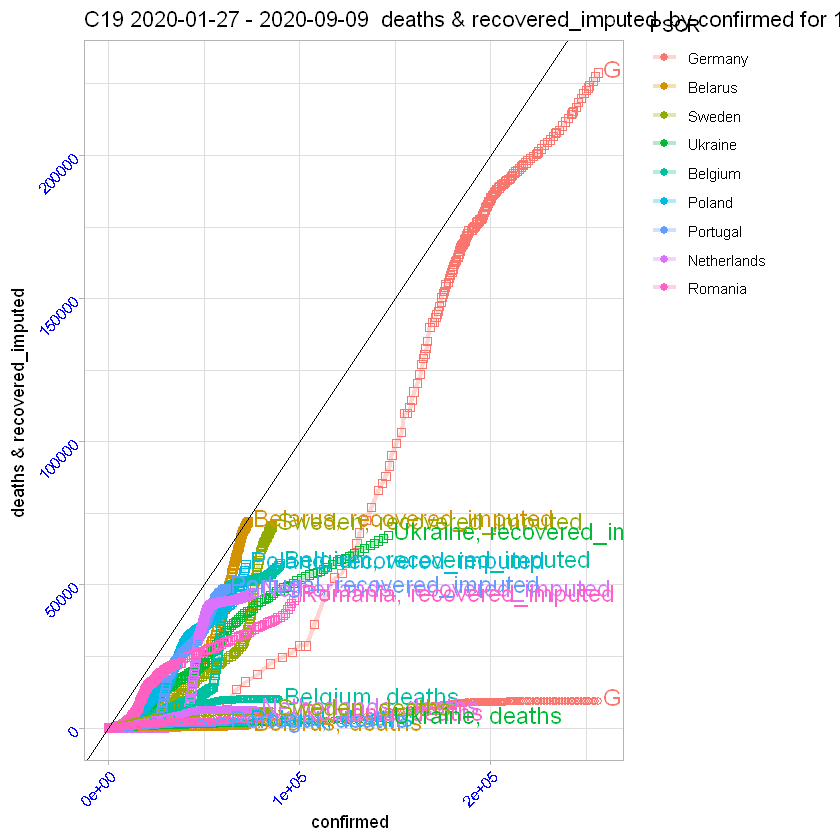

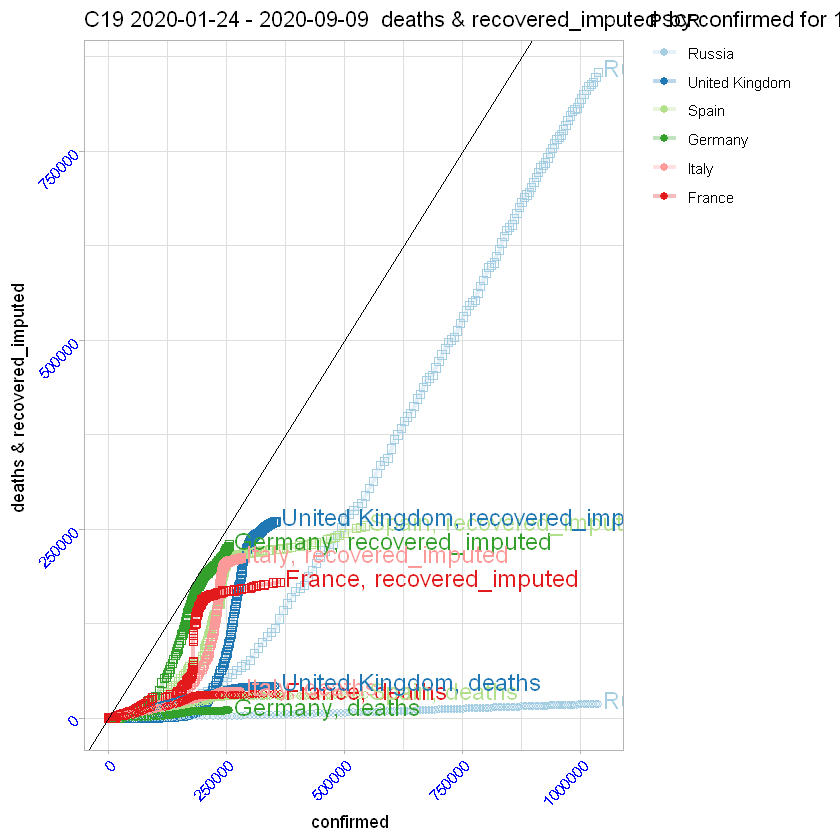

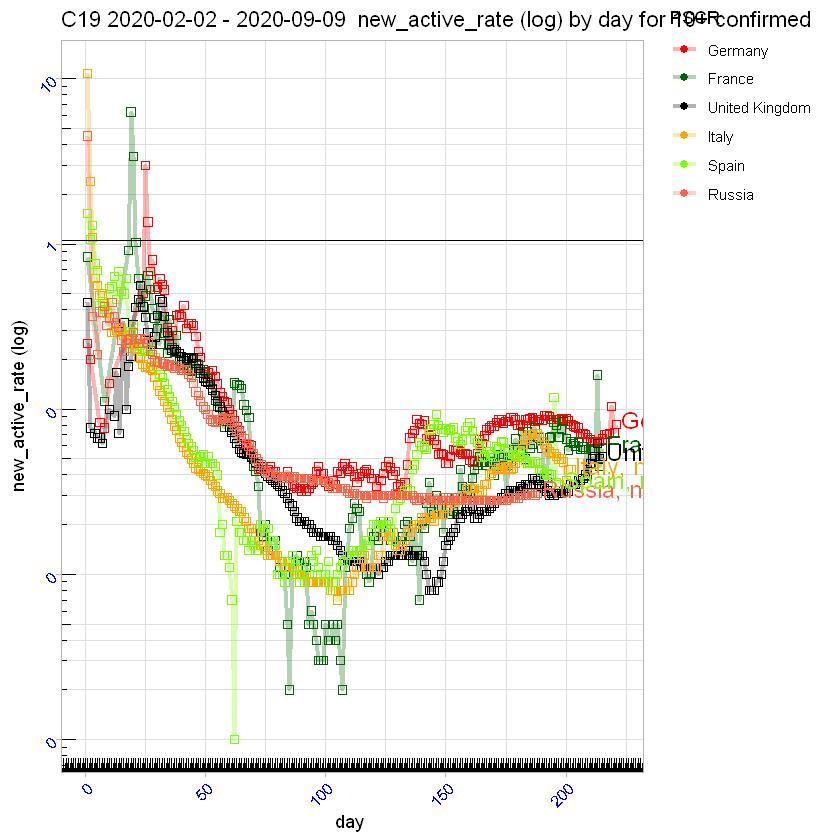

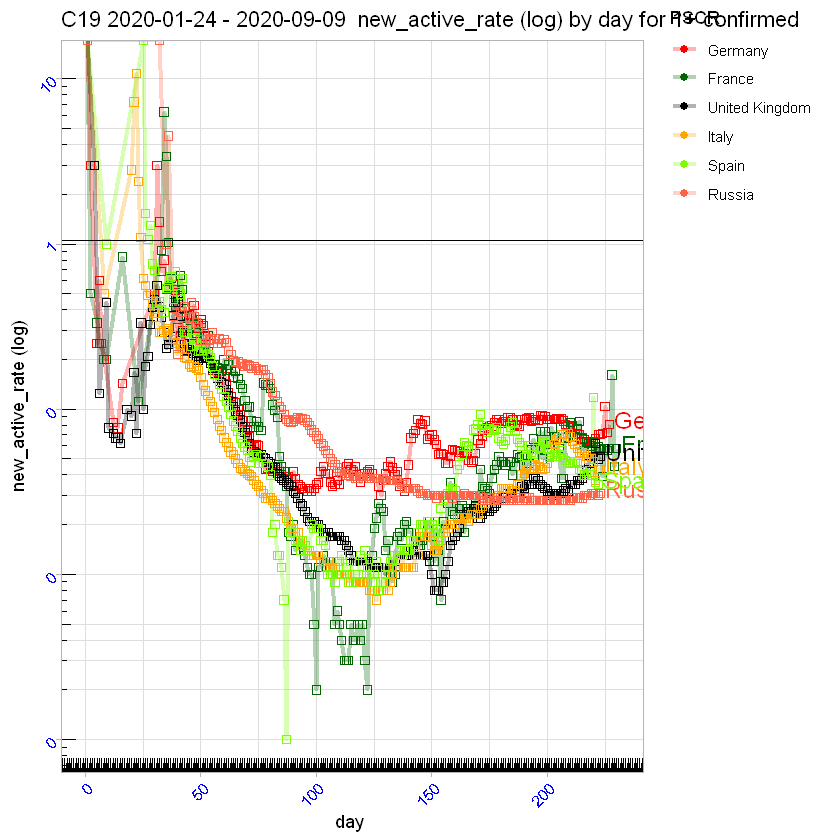

In [23]:
graph2crd_il(JHH,JHHRegios$`JHH Europe3`)
graph2crd_il(JHH,JHHRegios$`JHH Europe2`)
graph1dnar_iyl(JHH, JHHRegios$`JHH Europe2`)
 graphit(JHH, JHHRegios$`JHH Europe2`, minVal=1, xvar = 'day', 
          yvars = c('new_active_rate'), logy = TRUE, intercept = stableRate) 

The motor in all this is the graphit function. It is quite powerful but has a lot of parameters. Several functions preset some parameters, Below a list of Graphs defined. 

In [27]:
setdiff(myGraphList, c(myGraphListbyDate, myGraphListbyDay, myGraphNrs))
myGraphListbyDate #that don't get a number. This because then they do not get executed every day
myGraphListbyDay 
myGraphNrs

[1] "graph_DemoDoubling" "graphCodes"         "graphit"

[1] "graphDaa_fia"     "graphDaa_fiyl"    "graphDccp_fyl"    "graphDccprr_fiyl"
[5] "graphDddp_fyl"    "graphDg_fyl"      "graphDggnar_fiyl" "graphDgnar_fiyl" 
[9] "graphDrr_fia"

[1] "graphdarc_fiyl" "graphdarcs_iyl"

[1] "graph1Dc_fil"         "graph1Dc_finl"        "graph1dnar_iyl"      
 [4] "graph1dr_iyl"         "graph1Drr_il"         "graph2crd_il"        
 [7] "graph2dac_iyl"        "graph3Dard_fia"       "graph3Dard_fina"     
[10] "graph6Dardcra_fiMnyl" "graph6Dardcra_fiMyl"  "graph6Dardcra_finyl" 
[13] "graph6Dardcra_fiyl"

There is a system in the naming: 

In [28]:
graphCodes()

[1] "naming system:"
$nrvars
[1] 1 2 3 4 5 6

$letters
# A tibble: 8 x 2
  codes   meaning                         
  <chr>   <chr>                           
1 d/D/c/d day, Date, confirmed, death xvar
2 acrd_   initials/abbrev of yvars        
3 f       facet per ID                    
4 i       imputed                         
5 M       per million                     
6 n       new                             
7 y       logy                            
8 a/l     area or line                    

example graph1Dc_fiMnyl: confirmed by Date,  facet (by ID), use imputed, per Million, new (not cumulative), logy, line plot). 

The variable "myGraphNrs" contains all daily interesting graph functionnames one can pass as a parameter to walkThrough or makeHistoryGraphsRG.
